In [1]:
import os
import glob
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import Image
from IPython.display import HTML
from moviepy.editor import *
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# get today values
# else, use: date = 'YYYYmmdd', i.e.: 
# date = '20200707'
today = date.today()
date = today.strftime("%Y%m%d")

url00 = 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+date+'/nww3'+date+'_00z'
# url06 = 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+date+'/nww3'+date+'_06z'
# url12 = 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+date+'/nww3'+date+'_12z'
# url18 = 'https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+date+'/nww3'+date+'_18z'

# print all variables to check their names
file = netCDF4.Dataset(url00)
data = file.variables
# print(data)
file.close()

# create directory
dirName = 'test_Hs'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")


Directory  test_Hs  already exists


Example:


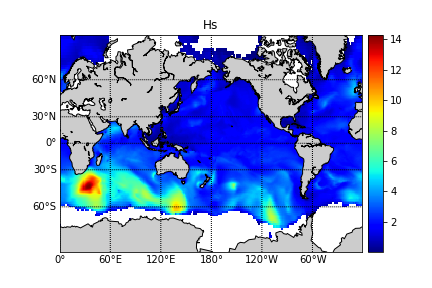

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [2]:
# example of Hs worldwide
file = netCDF4.Dataset(url00)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
time = file.variables['time'][:]
data = file.variables['htsgwsfc'][0,:,:]

# draw images
for t in range (0, 7):
    plt.figure()
    m=Basemap(projection='merc',llcrnrlon=lon.min(),urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max())
    x, y = m(*np.meshgrid(lon,lat))
    m.pcolormesh(x,y,file.variables['htsgwsfc'][int(t),:,:],shading='flat',cmap=plt.cm.jet)
    m.colorbar(location='right')
    m.drawcoastlines()
    m.fillcontinents()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
    plt.title('Hs')
    plt.savefig('test_Hs/'+str(t)+'.png')
    plt.clf()
file.close()

print('Example:')
Image('test_Hs/0.png')

In [3]:
# transform into video
files = glob.glob("test_Hs/*.png")
files_sorted = sorted(files, key=lambda x: float((x.split('test_Hs/')[1]).split('.png')[0]))
clips = [ImageClip(m).set_duration(1)
         for m in files_sorted]
concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile(date+".mp4", fps=20)

# delete images
os.system("rm -rf test_Hs")

t:   0%|          | 0/140 [00:00<?, ?it/s, now=None]

Moviepy - Building video 20200706.mp4.
Moviepy - Writing video 20200706.mp4



Moviepy - Done !
Moviepy - video ready 20200706.mp4


0

In [4]:
# play video
from IPython.display import Video

Video(date+'.mp4')